
# <center> TP7 - SVD, compression et débruitage d'image </center>

<center> 2023/2024 - T. Godin, L. Naert </center>
<center> IUT de Vannes, BUT Informatique </center>


***


_Merci à Eddie Aamari et aux enseignants de Paris Sorbonne Cité qui ont partagé le document dont ce TP est issu_


***

Téléchargez l'archive `data.zip` depuis la page moodle du cours. Copiez l'archive `data.zip` dans le même dossier que ce notebook et décompressez-la. Vous devez voir apparaître un dossier `data` contenant trois fichiers : `im1.npy`, `im2.npy`, `im3.npy`.

Pour commencer, on charge les packages et fichiers nécessaires.

In [13]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
plt.set_cmap('gray') # Permet d'afficher les images en niveaux de gris

<Figure size 640x480 with 0 Axes>

## Affichage d'images

Le but du jeu est d'afficher les images associées aux 3 fichiers `im1.npy`, `im2.npy`, `im3.npy` et de choisir votre préférée pour travailler avec elle pour la suite du TP.

En utilisant les commandes `M1=np.load('data/im1.npy')`, `type(M1)` et `M1.shape`, indiquer de quel type est la variable `M1`, et ses caractéristiques. Faire de même pour les deux autres fichiers `im2.npy`, `im3.npy`, en définissant deux nouvelles variables `M2` et  `M3`. 

In [14]:
M1=np.load('data/im1.npy')
M2=np.load('data/im2.npy')
M3=np.load('data/im3.npy')

print("type M1 :", type(M1))
print("type M2 :", type(M2))
print("type M3 :", type(M3))

print("Format M1 :", M1.shape)
print("Format M2 :", M2.shape)
print("Format M3 :", M3.shape)

type M1 : <class 'numpy.ndarray'>
type M2 : <class 'numpy.ndarray'>
type M3 : <class 'numpy.ndarray'>
Format M1 : (798, 1280)
Format M2 : (853, 1280)
Format M3 : (859, 1280)


En `python`, les images en noir et blanc sont traitées comme des matrices.

À l'aide de la commande `plt.imshow`, afficher les 3 images associées à `M1`, `M2` et `M3`. Choisissez votre préférée pour la suite et renommez-la `M`.

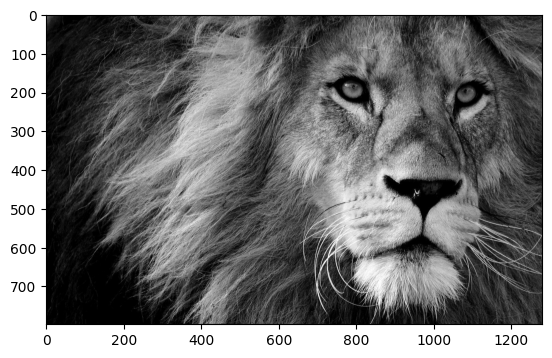

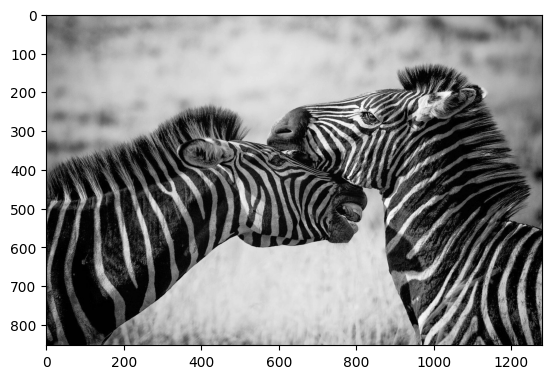

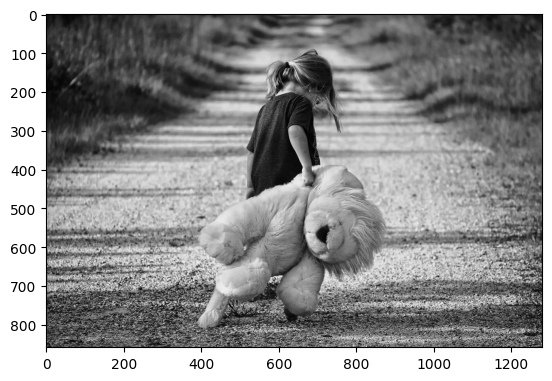

In [4]:
plt.imshow(M1)
plt.show()
plt.imshow(M2)
plt.show()
plt.imshow(M3)
plt.show()

M = M2

---
## Décomposition en valeurs singulières (SVD)
Toute matrice $M \in \mathcal{M}_{n,m}(\mathbb{R})$ admet une décomposition en valeurs singulières (SVD) donnée par :

<center> $M = U\Sigma V^\top$ </center>

où $U\in \mathcal{M}_{n}(\mathbb{R})$, $V\in \mathcal{M}_{m}(\mathbb{R})$ sont des matrices orthogonales  (c'est à dire que $U U^\top = U^\top U = I_n $ et  $V V^\top = V^\top V = I_m $) et $\Sigma \in \mathcal{M}_{n,m}(\mathbb{R})$ est une matrice diagonale (au sens des matrices rectangulaires) contenant les valeurs singulières de $M$.


Les valeurs singulières d'une matrices sont, en quelque sorte, la généralisation pour les matrices rectangulaires des valeurs propres vues durant les TP précédents.




>__Question 1__<br>
A l'aide de la commande `U,S,Vt=la.svd(M)`, effectuer la décomposition en valeurs singulières de `M`. Quels sont les formats de `U`, `S` et `Vt` ? Est-ce cohérent avec l'explication donnée au dessus ? 

In [15]:
U,S,Vt=la.svd(M)

print("Shape of M", M.shape)
print("Shape of S", S.shape)
print("Shape of U", U.shape)
print("Shape of Vt", Vt.shape)

#print(S)

Shape of M (853, 1280)
Shape of S (853,)
Shape of U (853, 853)
Shape of Vt (1280, 1280)


Réponse : La matrice U est bien une matrice carrée de taille "nombre de lignes" (n) de M. Idem, la matrice Vt est bien une matrice carrée de taille "nombre de colonnes de M" (m). Cependant S n'est pas une matrice. Il s'agit d'un vecteur de n valeurs correspondant aux valeurs singulières de M. Il faut donc mettre ces valeurs sous forme de diagonale dans une matrice n*m pour pouvoir effectuer le calcul USVt.


>__Question 2__<br>
Écrire une fonction `build(S,n,m)` qui prend en entrée un vecteur `S` et fournit en sortie la matrice $\Sigma$ décrite au dessus : une matrice diagonale (au sens des matrices rectangulaires) de taille $n\times m$, dont les éléments diagonaux sont `S[0], S[1],...` jusqu'à atteindre le dernier coefficient de `S`, et des $0$ partout ailleurs.

In [7]:
def build(S,n,m):
    sigma = np.zeros((n,m))
    for i in range(len(S)):
        sigma[i,i] = S[i]
    
    return sigma



>__Question 3__<br>
Créer une matrice diagonale `matS` de taille $n\times m$ et contenant sur sa diagonale les coefficients du vecteur `S` donné à la question 1.

In [8]:
n = M.shape[0]
m = M.shape[1]
matS = build(S,n,m)

>__Question 4__<br>
Vérifier la relation $M = U \Sigma V^\top$, en utilisant les matrices `U`, `matS` et `Vt` (on pourra utiliser la fonction numpy `allclose` pour effectuer la comparaison puisque l'on traite des float)


In [9]:
print(M)

print(U@matS@Vt)

print("Utilisation de allclose pour comparer les matrices. Matrices égales ?", np.allclose(M, U@matS@Vt))

[[ 99 100 104 ... 134 135 137]
 [107 106 103 ... 134 135 137]
 [100 104 105 ... 135 136 137]
 ...
 [ 47  14  11 ...   2  44  74]
 [ 53  20  15 ...  33  74  94]
 [ 56  23  17 ...  20  33  55]]
[[ 99. 100. 104. ... 134. 135. 137.]
 [107. 106. 103. ... 134. 135. 137.]
 [100. 104. 105. ... 135. 136. 137.]
 ...
 [ 47.  14.  11. ...   2.  44.  74.]
 [ 53.  20.  15. ...  33.  74.  94.]
 [ 56.  23.  17. ...  20.  33.  55.]]
Utilisation de allclose pour comparer les matrices. Matrices égales ? True


>__Question 5__<br>
À l'aide de la commande `plt.plot`, tracer le vecteur `S`. Dans quel ordre les valeurs singulières sont-elles classées ? Comment qualiferiez-vous la répartition entre grandes et petites valeurs singulières ?

Text(0.5, 1.0, 'Valeurs singlières')

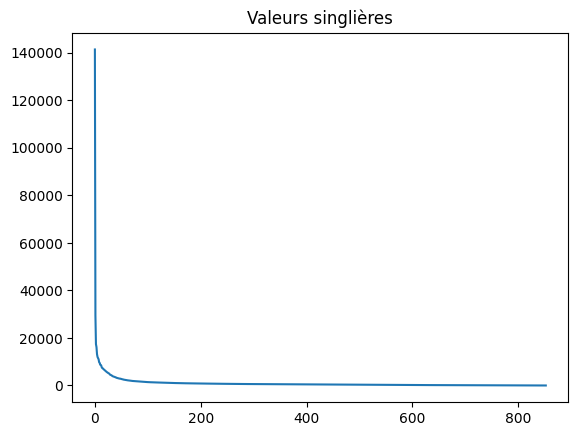

In [17]:
plt.plot(S)
plt.title("Valeurs singlières")
#plt.ylim((0,1000))

Réponse : Les valeurs singulières sont classées dans l'ordre ddécroissants : les plus grandes sont en premiers. Les valeurs singulières décroissent très vites. Hypothèse : les premières doivent contenir plus d'informations que les autres.

------------------


## Compression d'image



Dans cette partie, nous allons représenter la même image à partir d'une décomposition de la forme $U \Sigma V^\top$ de façon à utiliser moins d'espace, puis nous testerons visuellement le résultat.

### Filtrage


>__Question 6__ <br>
Écrire une fonction `filtre(A,t)` qui prend en entrée une matrice $A$ quelconque et un seuil de tolérance $\mathtt{t} \geq 0$, et renvoie la matrice $A_{(t)}$ qui coincide avec $A$, mais dans laquelle tous les coefficients vérifiant $A_{i,j} < t$ ont été remplacés par zéro
<br>
Évaluer visuellement le résultat lorsque $A$ correspond à l'image `M`. Faire varier le seuil $t$ : que constate-t-on ?

255 0
Seuil de  2.5500000000000003 ( 1 %)


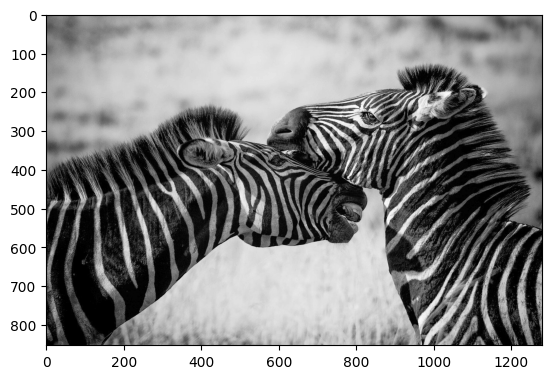

Seuil de  25.5 ( 10 %)


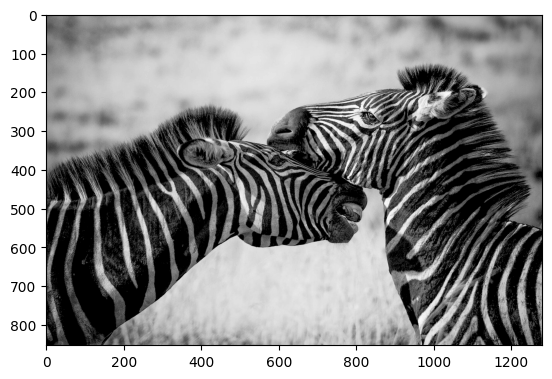

Seuil de  63.75 ( 25 %)


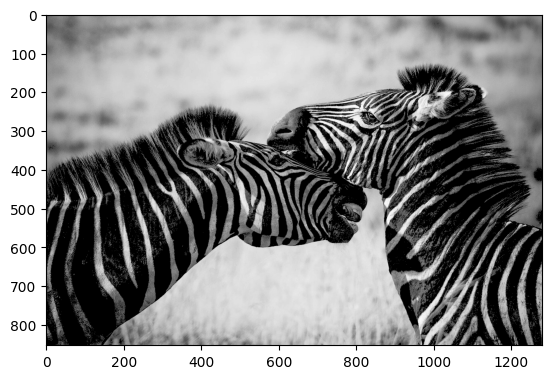

Seuil de  102.0 ( 40 %)


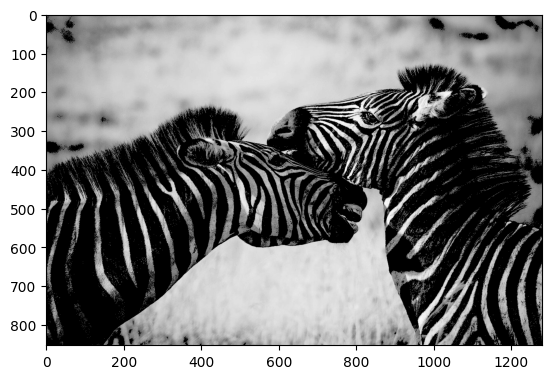

Seuil de  127.5 ( 50 %)


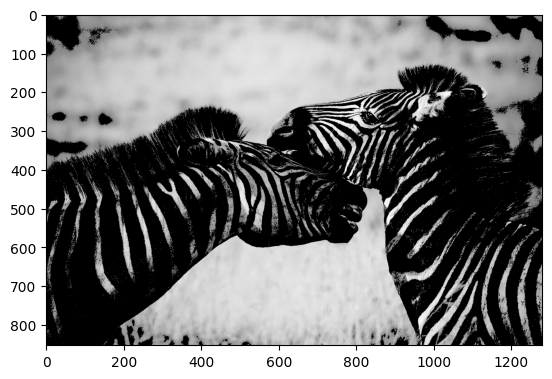

Seuil de  216.75 ( 85 %)


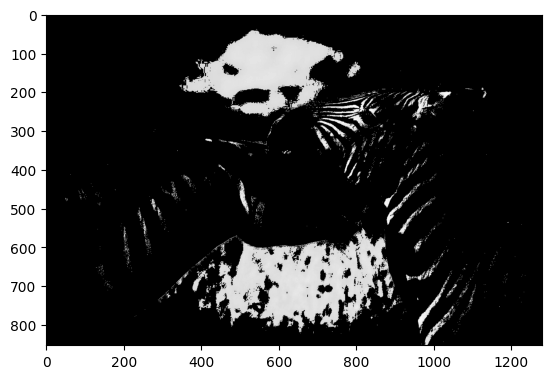

Seuil de  229.5 ( 90 %)


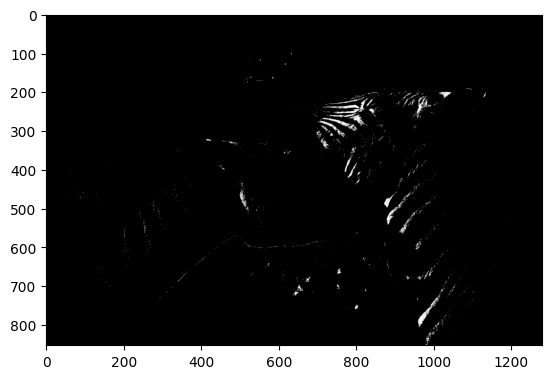

In [20]:
def filtre(A,t):
    At = A.copy()
    for i in range(len(A)):
        for j in range(len(A[i])):
            if(A[i,j] < t):
                At[i,j] = 0
    
    return At

print(np.max(M), np.min(M))

valT = [1, 10, 25, 40, 50, 85,90]
rangeM = np.max(M) - np.min(M)

for t in valT:
    seuil = t/100*rangeM+np.min(M)
    print("Seuil de ", seuil ,"(",t,"%)" )
    Mt = filtre(M,seuil)
    plt.imshow(Mt)
    plt.show()



Réponse : Les parties "sombres" (considérées comme cela en fonction du seuil) deviennent des applats de noir. Peu de différences en dessous de 25% (valeur de 67/255) pour le seuil. L'image perd visuellement en qualité au dessus de 25%.

>__Question 7__<br>
En utilisant la fonction précédente, calculer $U \Sigma_{(t)} V^\top$, où $A = U \Sigma V^\top$ est la décomposition en valeurs singulières de $A=$ `M`.<br>
Faire varier le seuil $t$ : que constate-t-on visuellement ?

Seuil de  146.14627437098653 ( 0.1 %)


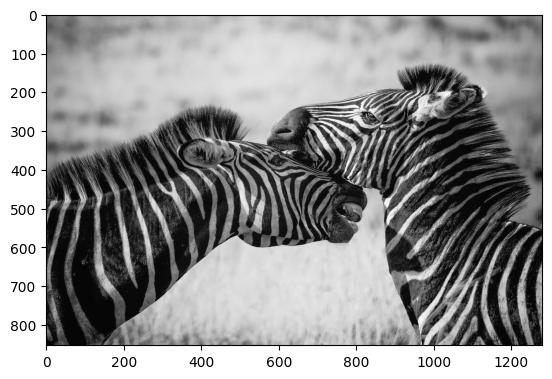

Seuil de  1418.318549971476 ( 1 %)


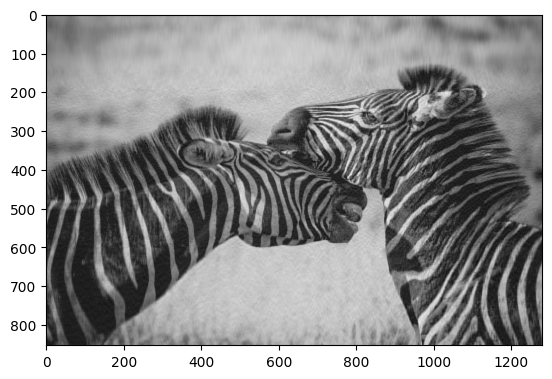

Seuil de  7072.417552640317 ( 5 %)


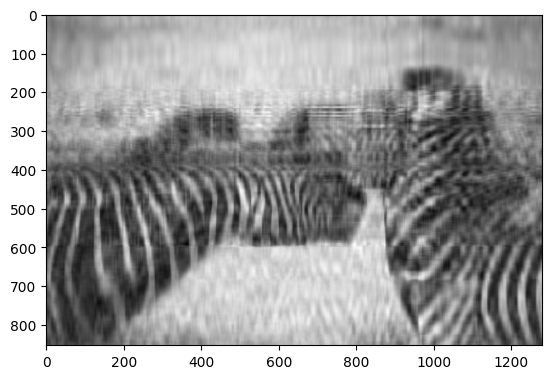

Seuil de  14140.041305976369 ( 10 %)


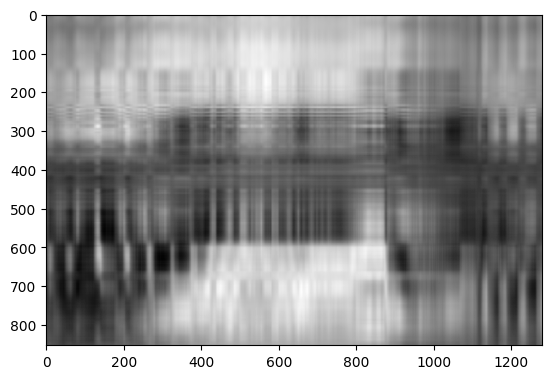

Seuil de  35342.91256598452 ( 25 %)


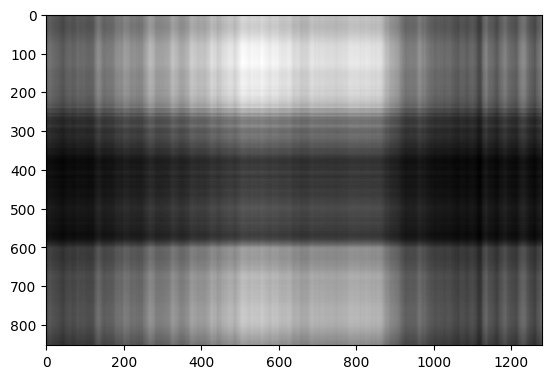

Seuil de  70681.03133266479 ( 50 %)


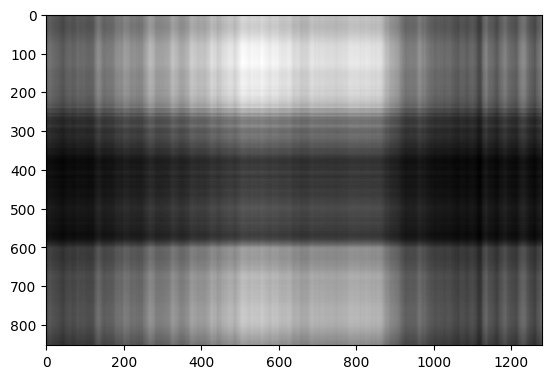

Seuil de  127222.02135935321 ( 90 %)


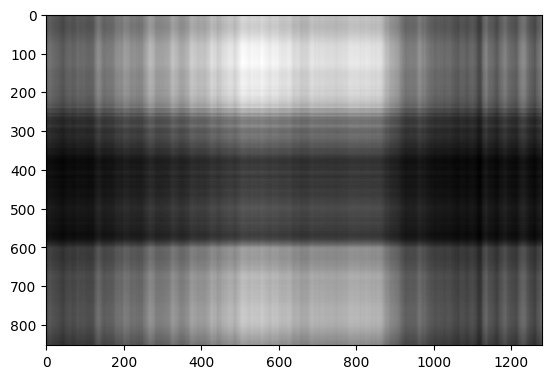

In [12]:
valT = [0.1,1, 5, 10, 25, 50, 90]
rangeS = np.max(S) - np.min(S)

for t in valT:
    seuil = t/100*rangeS+np.min(S)
    print("Seuil de ", seuil ,"(",t,"%)" )
    Mt = filtre(matS,seuil)
    plt.imshow(U@Mt@Vt)
    plt.show()




Réponse : L'image se floute très rapidement par colonnes/lignes. On perd très vite en qualité (dès 1%). Les poucentages ont peu de sens car il y a très peu de valeurs très hautes qui ont donc un poids énorme.Il reste très vite, très peu de valeurs singulières. 

>__Question 8__<br>
Écrire une fonction `filtreK(sigma, k)` qui, plutôt que de seuiller $\Sigma$ à une valeur $t$ fixée, renvoie $\Sigma^{(k)}$ ayant ses $k$ premiers coefficients diagonaux égaux à ceux de $\Sigma$, et zéro ailleurs. Le paramètre `sigma` est une matrice de taille $nm$ avec les valeurs singulières sur la diagonale ($\Sigma$).<br>
Calculer $U \Sigma^{(k)} V^\top$, où $A = U \Sigma V^\top$ est la décomposition en valeurs singulières de $A=$ `M`.<br>
Faire varier le seuil $k$ et commenter (en comparant visuellement les résultats avec la méthode précedente).

Seuil de  8 ( 1 %)


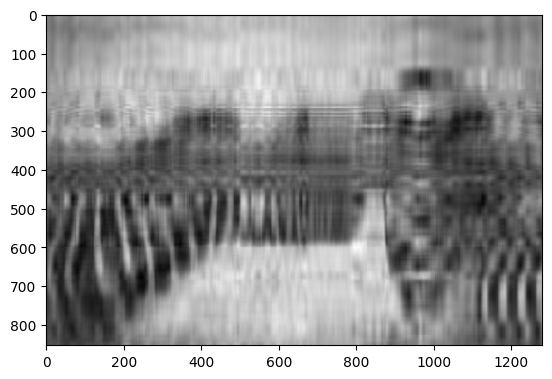

Seuil de  42 ( 5 %)


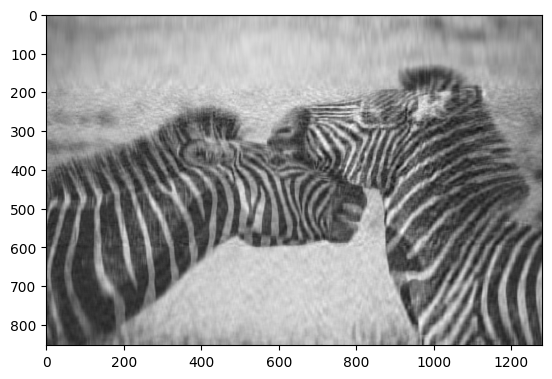

Seuil de  85 ( 10 %)


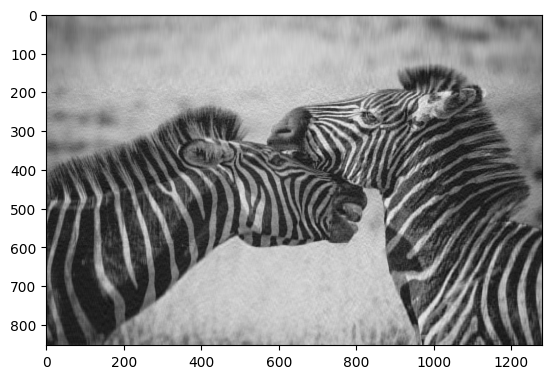

Seuil de  213 ( 25 %)


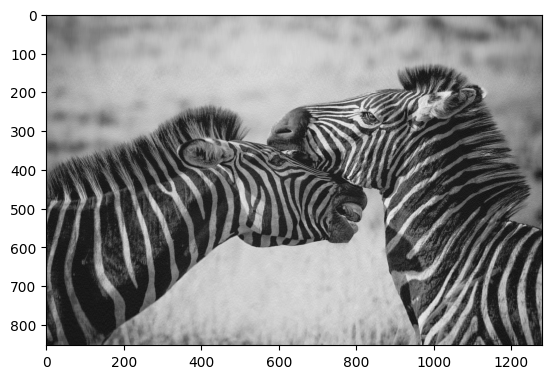

Seuil de  426 ( 50 %)


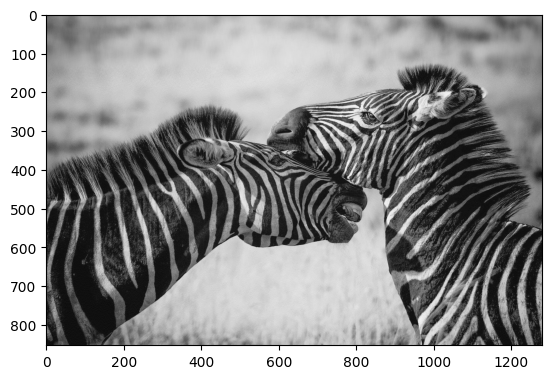

Seuil de  767 ( 90 %)


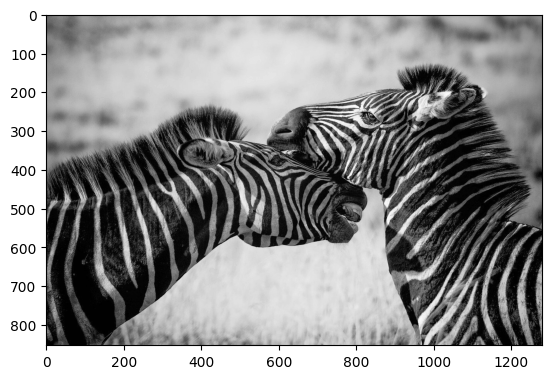

In [22]:
def filtreK(sigma, k):
    n = sigma.shape[0]
    m = sigma.shape[1]
    sfiltre = sigma.copy()
    for i in range(k, n):
        for j in range (k, m):
            sfiltre[i,j] = 0
    return sfiltre

filtreK(matS, 50)

valK = [1, 5, 10, 25, 50, 90]
rangeS = len(S)


for k in valK:
    seuil = int(k/100*rangeS)
    print("Seuil de ", seuil ,"(",k,"%)" )
    Mk = filtreK(matS,seuil)
    plt.imshow(U@Mk@Vt)
    plt.show()



Réponse : Même principe que précédemment mais avec un peu plus de sens. On arrive assez vite (en conservant peu de valeurs singulières) à retrouver une image lisible, voir de qualité (en conservant 25% de l'info par exemple).

### Compression


Comme on a conservé uniquement  $k$ valeurs non nulles pour $\Sigma$, on n'a plus besoin de stocker certaines informations dans $U$ et $V$.

Plus précisément, dans  $U \Sigma^{(k)} V^\top \approx M $, peut ne conserver  que les $k$ premières colonnes de $U$, les $k$ première lignes et colonnes de $\Sigma$ et les $k$ premières lignes de $V$.

On notera $U_k, \Sigma^{(k)}_k   $ et $V_k$ les matrices ainsi obtenue.


>__Question 9__<br>
Calculer $U_k \Sigma^{(k)}_k V^\top_k$, où $A = U \Sigma V^\top$ est la décomposition en valeurs singulières de $A=$ `M`.<br>
Faire varier le seuil $k$, constater que peu importe le choix de $k$ , on a $U_k \Sigma^{(k)}_k V^\top_k = U \Sigma^{(k)} V^\top$ (on pourra utiliser la fonction numpy `allclose` pour effectuer la comparaison puisque l'on traite des float)


Seuil de  8 ( 1 %)


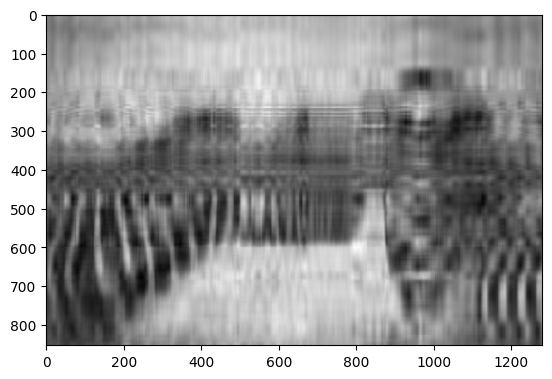

Comparaison :  True
Seuil de  42 ( 5 %)


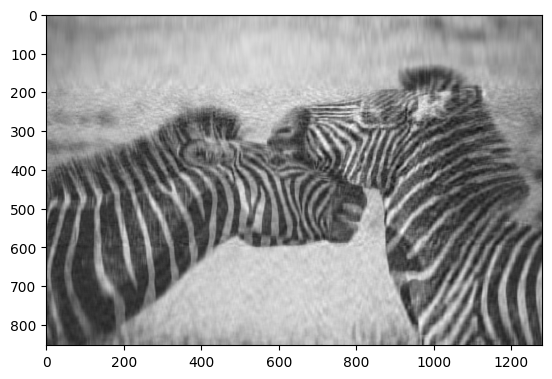

Comparaison :  True
Seuil de  85 ( 10 %)


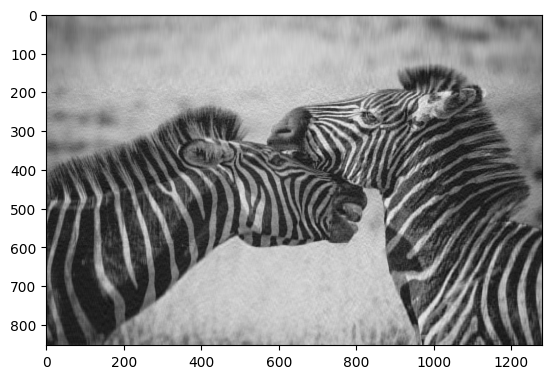

Comparaison :  True
Seuil de  213 ( 25 %)


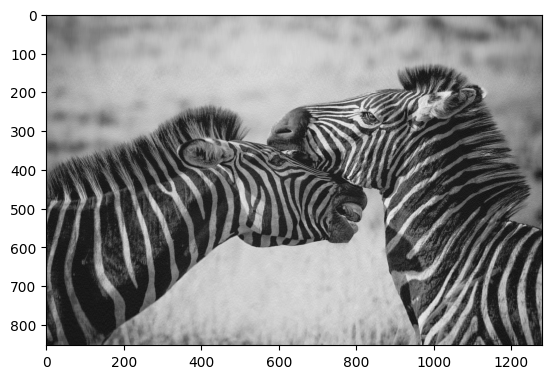

Comparaison :  True
Seuil de  426 ( 50 %)


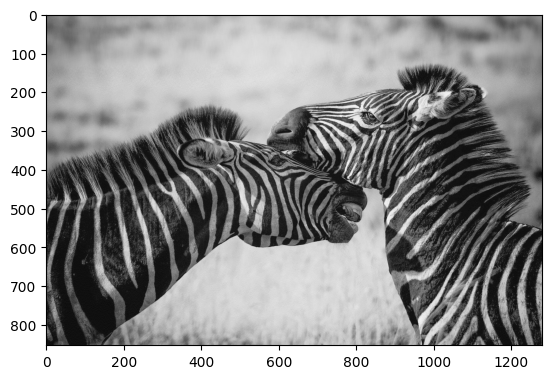

Comparaison :  True
Seuil de  767 ( 90 %)


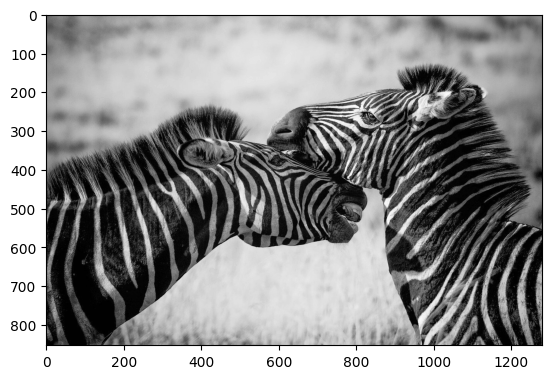

Comparaison :  True


In [23]:
k = 50
valK = [1, 5, 10, 25, 50, 90]
rangeS = len(S)


for k in valK:
    seuil = int(k/100*rangeS)
    print("Seuil de ", seuil ,"(",k,"%)" )
    Mk = filtreK(matS,seuil)
    plt.imshow(U[:,:seuil]@Mk[:seuil,:seuil]@Vt[:seuil,:])
    plt.show()
    print("Comparaison : ", np.allclose(U[:,:seuil]@Mk[:seuil,:seuil]@Vt[:seuil,:], U@Mk@Vt))


>__Question 10__<br>
Écrire une fonction `txCompression(M, k)` calculant le taux de compression, c'est-à-dire le nombre de coefficients dans $U_k \Sigma^{(k)}_k V^\top_k$  divisé par le nombre de coefficients dans l'image `M` d'origine. <br>
<br> Tracer ce ratio en fonction de $k$.
Donner une formule exacte pour ce taux.




Réponse : 

taux = k*(n+k+m)/(m*n)
On peut remarquer qu'il ne sert à rien de stocker les 0 de sigma et donc le k devient 1 : 

taux = k*(n+1+m)/(m*n)


Text(0.5, 1.0, 'Taux de compression')

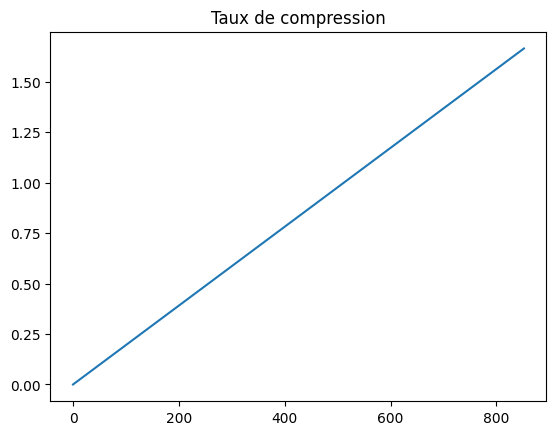

In [24]:
def txCompression(M, k):
    n, m = M.shape
    return k*(m+n+1)/(m*n)

n, m = M.shape
nbValPropre = min(m,n)
taux = []
for k in range(nbValPropre):
    taux.append(txCompression(M,k))

plt.plot(taux)
plt.title("Taux de compression")


>__Question 11__<br>
Écrire une fonction `affiche(M,k)` qui affiche l'image où l'on a gardé que les $k$ premières valeurs et renvoie le taux de compression

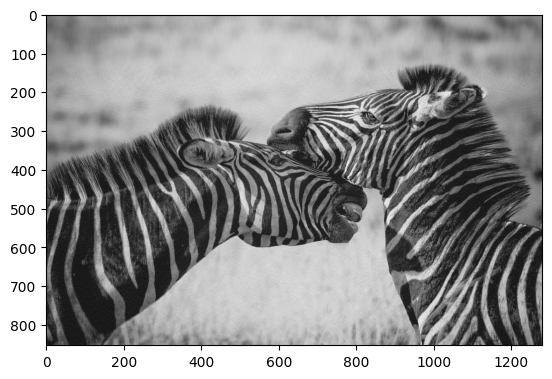

0.3908997655334115

In [25]:
def affiche(M,k):
    U,S,Vt=la.svd(M)
    matS = build(S, M.shape[0], M.shape[1])
    Mk = filtreK(matS,k)
    plt.imshow(U[:,:k]@Mk[:k,:k]@Vt[:k,:])
    plt.show()
    return txCompression(M, k)

affiche(M, 200)



>__Question 12__
En utilisant la formule du taux de compression, écrire une fonction `afficheRatio(M,r)` qui affiche l'image compressée à un taux/ratio de $r$ et retourne `k`, le nombre de valeurs singulières conservées.

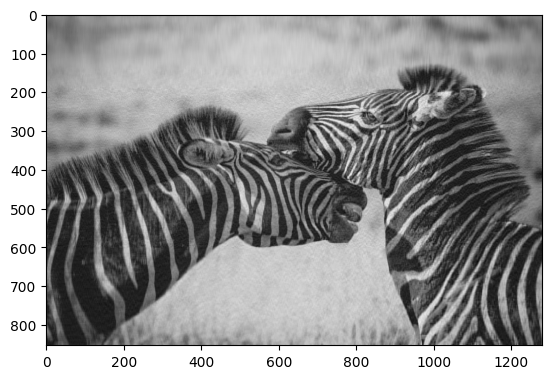

102

In [26]:
def afficheRatio(M,r):
    U,S,Vt=la.svd(M)
    n,m = M.shape
    matS = build(S, n,m)
    k = min(int((r*m*n)/(n+m+1)), min(n,m)) #pour pas dépasser le nombre de valeurs singulieres
    Mk = filtreK(matS,k)
    plt.imshow(U[:,:k]@Mk[:k,:k]@Vt[:k,:])
    plt.show()
    return k

afficheRatio(M,0.2)

## Débruitage d'images

Dans cette partie, on se donne une image bruitee, representee par la matrice `Mb` definie comme suit:

In [27]:
epsilon = 50
Mb = M + epsilon*np.random.normal(0,1,size=(np.shape(M)[0],np.shape(M)[1]))



>__Question 13__<br>
Visualiser l’image bruitée

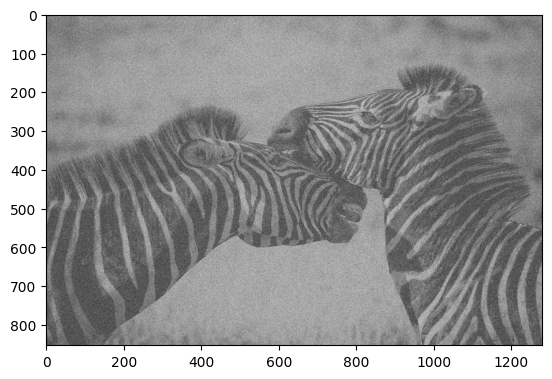

In [28]:
plt.imshow(Mb)

On mesure l’ecart  induit par le bruit en calculant $\Vert M_b − M\Vert$ : 

In [29]:
normb = la.norm(Mb-M)
print(normb)

52250.46570960338



>__Question 14__<br>
Calculer la décomposition SVD de `Mb`, et filtrer ses valeurs singulières plus petites que
$t = 3000$.<br>
Comment vous apparaît l’image $M_r(t)$ ainsi obtenue ? 
<br>Calculer $\Vert M_r(t) - M \Vert$.

Nouvelle différence 31320.189657733798
C'est mieux !


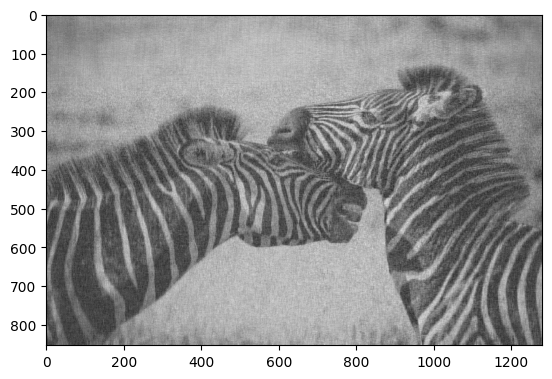

In [30]:
Ub,Sb,Vtb=la.svd(Mb)
nb,mb = Mb.shape
Sr = filtre(build(Sb,nb,mb),3000)
Mr = Ub@Sr@Vtb
plt.imshow(Mr)
normr = la.norm(Mr-M)
print('Nouvelle différence', normr)
print("C'est mieux !")


>__Question 15__<br>
En calculant $\Vert M_r(t) - M \Vert$ pour différentes valeurs de $t$, estimer la valeur $t^\ast$ pour laquelle l'erreur est minimale. 
<br>Visualiser l'image ainsi débruitée.

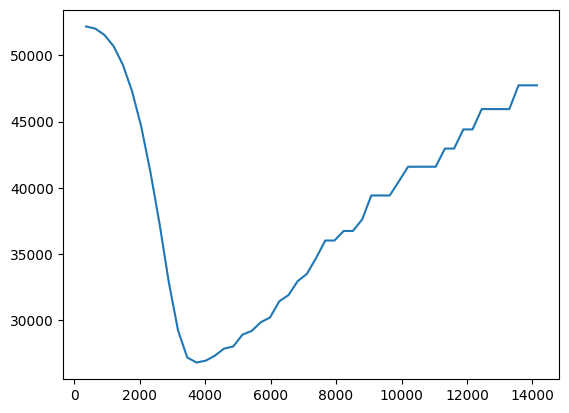

3737.666662743726
Nouvelle différence 26825.023613841113
C'est encore mieux !


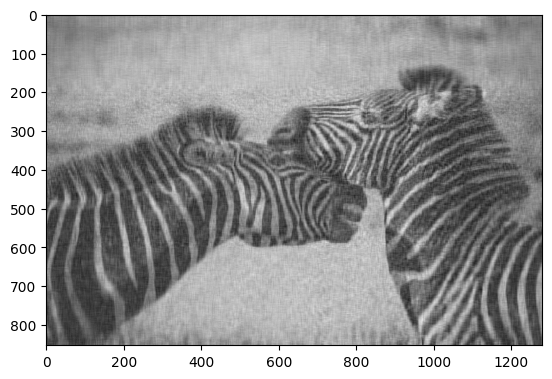

In [112]:
#Ub,Sb,Vtb=la.svd(Mb)
nb,mb = Mb.shape

norms = []
t_range = np.linspace(min(Sb),max(Sb)/10,50)
for t in t_range:
    Sr = filtre(build(Sb,nb,mb),t)
    Mr = Ub@Sr@Vtb
    normr = la.norm(Mr-M)
    norms.append(normr)


plt.plot(t_range, norms)
tstar = np.argmin(norms)
plt.show()
Sr = filtre(build(Sb,nb,mb),t_range[tstar])
print(t_range[tstar])
Mr = Ub@Sr@Vtb
plt.imshow(Mr)
normr = la.norm(Mr-M)
print('Nouvelle différence', normr)
print("C'est encore mieux !")